In [1]:
!pip install scikit-plot

In [1]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
%matplotlib inline

from sklearn.preprocessing import  StandardScaler
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.linear_model import SGDRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
train_data=pd.read_csv(r'C:\Users\monish\Downloads\Project-Housing--2-\Project-Housing_splitted\train.csv')
train_data

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     127         120       RL          NaN     4928   Pave   NaN      IR1   
1     889          20       RL         95.0    15865   Pave   NaN      IR1   
2     793          60       RL         92.0     9920   Pave   NaN      IR1   
3     110          20       RL        105.0    11751   Pave   NaN      IR1   
4     422          20       RL          NaN    16635   Pave   NaN      IR1   
...   ...         ...      ...          ...      ...    ...   ...      ...   
1163  289          20       RL          NaN     9819   Pave   NaN      IR1   
1164  554          20       RL         67.0     8777   Pave   NaN      Reg   
1165  196         160       RL         24.0     2280   Pave   NaN      Reg   
1166   31          70  C (all)         50.0     8500   Pave  Pave      Reg   
1167  617          60       RL          NaN     7861   Pave   NaN      IR1   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1163         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1164         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1165         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1166         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1167         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2007        WD         Normal     128000  
1        10   2007        WD         Normal     268000  
2         6   2007        WD         Normal     269790  
3         1   2010       COD         Normal     190000  
4         6   2009        WD         Normal     215000  
...     ...    ...       ...            ...        ...  
1163      2   2010        WD         Normal     122000  
1164      5   2009        WD         Normal     108000  
1165      7   2009        WD         Normal     148500  
1166      7   2008        WD         Normal      40000  
1167      6   2006        WD         Normal     183200  

[1168 rows x 81 columns]

In [3]:
test_data=pd.read_csv(r'C:\Users\monish\Downloads\Project-Housing--2-\Project-Housing_splitted\test.csv')
test_data

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     337          20       RL         86.0    14157   Pave   NaN      IR1   
1    1018         120       RL          NaN     5814   Pave   NaN      IR1   
2     929          20       RL          NaN    11838   Pave   NaN      Reg   
3    1148          70       RL         75.0    12000   Pave   NaN      Reg   
4    1227          60       RL         86.0    14598   Pave   NaN      IR1   
..    ...         ...      ...          ...      ...    ...   ...      ...   
287    83          20       RL         78.0    10206   Pave   NaN      Reg   
288  1048          20       RL         57.0     9245   Pave   NaN      IR2   
289    17          20       RL          NaN    11241   Pave   NaN      IR1   
290   523          50       RM         50.0     5000   Pave   NaN      Reg   
291  1379         160       RM         21.0     1953   Pave   NaN      Reg   

    LandContour Utilities  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
0           HLS    AllPub  ...           0        0    NaN   NaN         NaN   
1           Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
2           Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
3           Bnk    AllPub  ...           0        0    NaN   NaN         NaN   
4           Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
..          ...       ...  ...         ...      ...    ...   ...         ...   
287         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
288         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
289         Lvl    AllPub  ...           0        0    NaN   NaN        Shed   
290         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
291         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   

    MiscVal MoSold  YrSold  SaleType  SaleCondition  
0         0      7    2007        WD         Normal  
1         0      8    2009       COD        Abnorml  
2         0      6    2009        WD         Normal  
3         0      7    2009        WD         Normal  
4         0      1    2008        WD         Normal  
..      ...    ...     ...       ...            ...  
287       0     10    2008        WD         Normal  
288       0      2    2008        WD         Normal  
289     700      3    2010        WD         Normal  
290       0     10    2006        WD         Normal  
291       0      6    2006        WD         Normal  

[292 rows x 80 columns]

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

# We will delete the column which are not useful and which has data less than 30% such as PoolQC,Fence,MiscFeature,Alley from train_data

In [5]:
train_data.drop(['Id','Alley','PoolQC','Fence','MiscFeature','Electrical'],axis=1,inplace=True)

In [6]:
train_data

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0            120       RL          NaN     4928   Pave      IR1         Lvl   
1             20       RL         95.0    15865   Pave      IR1         Lvl   
2             60       RL         92.0     9920   Pave      IR1         Lvl   
3             20       RL        105.0    11751   Pave      IR1         Lvl   
4             20       RL          NaN    16635   Pave      IR1         Lvl   
...          ...      ...          ...      ...    ...      ...         ...   
1163          20       RL          NaN     9819   Pave      IR1         Lvl   
1164          20       RL         67.0     8777   Pave      Reg         Lvl   
1165         160       RL         24.0     2280   Pave      Reg         Lvl   
1166          70  C (all)         50.0     8500   Pave      Reg         Lvl   
1167          60       RL          NaN     7861   Pave      IR1         Lvl   

     Utilities LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch  \
0       AllPub    Inside       Gtl  ...             0         0           0   
1       AllPub    Inside       Mod  ...             0         0         224   
2       AllPub   CulDSac       Gtl  ...             0         0           0   
3       AllPub    Inside       Gtl  ...             0         0           0   
4       AllPub       FR2       Gtl  ...             0         0           0   
...        ...       ...       ...  ...           ...       ...         ...   
1163    AllPub    Inside       Gtl  ...             0         0           0   
1164    AllPub    Inside       Gtl  ...             0         0           0   
1165    AllPub       FR2       Gtl  ...             0         0           0   
1166    AllPub    Inside       Gtl  ...           172         0           0   
1167    AllPub    Inside       Gtl  ...             0         0           0   

     PoolArea MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  
0           0       0       2    2007        WD         Normal    128000  
1           0       0      10    2007        WD         Normal    268000  
2           0       0       6    2007        WD         Normal    269790  
3           0       0       1    2010       COD         Normal    190000  
4           0       0       6    2009        WD         Normal    215000  
...       ...     ...     ...     ...       ...            ...       ...  
1163        0       0       2    2010        WD         Normal    122000  
1164        0       0       5    2009        WD         Normal    108000  
1165        0       0       7    2009        WD         Normal    148500  
1166        0       0       7    2008        WD         Normal     40000  
1167        0       0       6    2006        WD         Normal    183200  

[1168 rows x 75 columns]

In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    247 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          14 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

# We will delete the column which are not useful and which has data less than 30% such as PoolQC,Fence,MiscFeature,Alley from test_data

In [8]:
test_data.drop(['Id','Alley','PoolQC','Fence','MiscFeature','Electrical'],axis=1,inplace=True)
test_data

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0            20       RL         86.0    14157   Pave      IR1         HLS   
1           120       RL          NaN     5814   Pave      IR1         Lvl   
2            20       RL          NaN    11838   Pave      Reg         Lvl   
3            70       RL         75.0    12000   Pave      Reg         Bnk   
4            60       RL         86.0    14598   Pave      IR1         Lvl   
..          ...      ...          ...      ...    ...      ...         ...   
287          20       RL         78.0    10206   Pave      Reg         Lvl   
288          20       RL         57.0     9245   Pave      IR2         Lvl   
289          20       RL          NaN    11241   Pave      IR1         Lvl   
290          50       RM         50.0     5000   Pave      Reg         Lvl   
291         160       RM         21.0     1953   Pave      Reg         Lvl   

    Utilities LotConfig LandSlope  ... OpenPorchSF EnclosedPorch 3SsnPorch  \
0      AllPub    Corner       Gtl  ...          51             0         0   
1      AllPub   CulDSac       Gtl  ...           0             0         0   
2      AllPub    Inside       Gtl  ...         151             0         0   
3      AllPub    Inside       Gtl  ...           0             0         0   
4      AllPub   CulDSac       Gtl  ...          18             0         0   
..        ...       ...       ...  ...         ...           ...       ...   
287    AllPub    Inside       Gtl  ...          99             0         0   
288    AllPub    Inside       Gtl  ...           0             0         0   
289    AllPub   CulDSac       Gtl  ...           0             0         0   
290    AllPub    Corner       Gtl  ...          24            36         0   
291    AllPub    Inside       Gtl  ...           0             0         0   

    ScreenPorch PoolArea  MiscVal  MoSold  YrSold  SaleType SaleCondition  
0             0        0        0       7    2007        WD        Normal  
1             0        0        0       8    2009       COD       Abnorml  
2             0        0        0       6    2009        WD        Normal  
3             0        0        0       7    2009        WD        Normal  
4             0        0        0       1    2008        WD        Normal  
..          ...      ...      ...     ...     ...       ...           ...  
287           0        0        0      10    2008        WD        Normal  
288           0        0        0       2    2008        WD        Normal  
289           0        0      700       3    2010        WD        Normal  
290           0        0        0      10    2006        WD        Normal  
291           0        0        0       6    2006        WD        Normal  

[292 rows x 74 columns]

In [9]:
train_data.isna().sum()

MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 75, dtype: int64

In [10]:
test_data.isna().sum()

MSSubClass        0
MSZoning          0
LotFrontage      45
LotArea           0
Street            0
                 ..
MiscVal           0
MoSold            0
YrSold            0
SaleType          0
SaleCondition     0
Length: 74, dtype: int64

In [11]:
for i in range(len(train_data.index)) :
    print("Nan in row ", i , " : " ,  train_data.iloc[i].isnull().sum())

Nan in row  0  :  1
Nan in row  1  :  0
Nan in row  2  :  0
Nan in row  3  :  0
Nan in row  4  :  1
Nan in row  5  :  0
Nan in row  6  :  1
Nan in row  7  :  0
Nan in row  8  :  1
Nan in row  9  :  1
Nan in row  10  :  0
Nan in row  11  :  0
Nan in row  12  :  1
Nan in row  13  :  1
Nan in row  14  :  1
Nan in row  15  :  0
Nan in row  16  :  2
Nan in row  17  :  1
Nan in row  18  :  1
Nan in row  19  :  1
Nan in row  20  :  0
Nan in row  21  :  1
Nan in row  22  :  1
Nan in row  23  :  2
Nan in row  24  :  1
Nan in row  25  :  1
Nan in row  26  :  2
Nan in row  27  :  0
Nan in row  28  :  0
Nan in row  29  :  0
Nan in row  30  :  0
Nan in row  31  :  0
Nan in row  32  :  1
Nan in row  33  :  2
Nan in row  34  :  6
Nan in row  35  :  1
Nan in row  36  :  0
Nan in row  37  :  0
Nan in row  38  :  1
Nan in row  39  :  1
Nan in row  40  :  0
Nan in row  41  :  1
Nan in row  42  :  1
Nan in row  43  :  1
Nan in row  44  :  1
Nan in row  45  :  1
Nan in row  46  :  0
Nan in row  47  :  1
Na

Nan in row  426  :  1
Nan in row  427  :  1
Nan in row  428  :  0
Nan in row  429  :  6
Nan in row  430  :  1
Nan in row  431  :  0
Nan in row  432  :  5
Nan in row  433  :  0
Nan in row  434  :  0
Nan in row  435  :  2
Nan in row  436  :  1
Nan in row  437  :  1
Nan in row  438  :  0
Nan in row  439  :  0
Nan in row  440  :  1
Nan in row  441  :  0
Nan in row  442  :  0
Nan in row  443  :  1
Nan in row  444  :  1
Nan in row  445  :  0
Nan in row  446  :  1
Nan in row  447  :  1
Nan in row  448  :  0
Nan in row  449  :  2
Nan in row  450  :  2
Nan in row  451  :  0
Nan in row  452  :  0
Nan in row  453  :  0
Nan in row  454  :  0
Nan in row  455  :  1
Nan in row  456  :  0
Nan in row  457  :  0
Nan in row  458  :  0
Nan in row  459  :  0
Nan in row  460  :  1
Nan in row  461  :  0
Nan in row  462  :  1
Nan in row  463  :  1
Nan in row  464  :  1
Nan in row  465  :  2
Nan in row  466  :  1
Nan in row  467  :  0
Nan in row  468  :  6
Nan in row  469  :  1
Nan in row  470  :  1
Nan in row

Nan in row  974  :  1
Nan in row  975  :  1
Nan in row  976  :  1
Nan in row  977  :  0
Nan in row  978  :  1
Nan in row  979  :  0
Nan in row  980  :  1
Nan in row  981  :  0
Nan in row  982  :  1
Nan in row  983  :  2
Nan in row  984  :  1
Nan in row  985  :  1
Nan in row  986  :  0
Nan in row  987  :  1
Nan in row  988  :  1
Nan in row  989  :  1
Nan in row  990  :  1
Nan in row  991  :  0
Nan in row  992  :  0
Nan in row  993  :  0
Nan in row  994  :  1
Nan in row  995  :  1
Nan in row  996  :  0
Nan in row  997  :  0
Nan in row  998  :  1
Nan in row  999  :  1
Nan in row  1000  :  1
Nan in row  1001  :  1
Nan in row  1002  :  1
Nan in row  1003  :  0
Nan in row  1004  :  1
Nan in row  1005  :  0
Nan in row  1006  :  1
Nan in row  1007  :  0
Nan in row  1008  :  1
Nan in row  1009  :  1
Nan in row  1010  :  1
Nan in row  1011  :  1
Nan in row  1012  :  1
Nan in row  1013  :  0
Nan in row  1014  :  0
Nan in row  1015  :  1
Nan in row  1016  :  1
Nan in row  1017  :  1
Nan in row  10

In [12]:
# Finding The Unique Value of the Train_data
for each_col in train_data.columns:
    print(each_col)
    print(train_data[each_col].value_counts())
    print("")

MSSubClass
20     428
60     244
50     113
120     69
70      53
30      52
160     47
80      43
90      41
190     26
85      19
75      14
45      10
180      6
40       3
Name: MSSubClass, dtype: int64

MSZoning
RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64

LotFrontage
60.0     111
80.0      60
70.0      58
75.0      46
50.0      44
        ... 
112.0      1
111.0      1
144.0      1
102.0      1
149.0      1
Name: LotFrontage, Length: 106, dtype: int64

LotArea
9600     21
7200     18
6000     16
8400     14
9000     11
         ..
9439      1
7390      1
8160      1
7388      1
13284     1
Name: LotArea, Length: 892, dtype: int64

Street
Pave    1164
Grvl       4
Name: Street, dtype: int64

LotShape
Reg    740
IR1    390
IR2     32
IR3      6
Name: LotShape, dtype: int64

LandContour
Lvl    1046
Bnk      50
HLS      42
Low      30
Name: LandContour, dtype: int64

Utilities
AllPub    1168
Name: Utilities, dtype: int64

Lo

In [13]:
# Finding The Unique Value of the Train_data
for each_col in test_data.columns:
    print(each_col)
    print(test_data[each_col].value_counts())
    print("")

MSSubClass
20     108
60      55
50      31
120     18
30      17
160     16
80      15
90      11
70       7
190      4
180      4
75       2
45       2
85       1
40       1
Name: MSSubClass, dtype: int64

MSZoning
RL         223
RM          55
FV          13
C (all)      1
Name: MSZoning, dtype: int64

LotFrontage
60.0     32
85.0     14
50.0     13
70.0     12
80.0      9
         ..
124.0     1
71.0      1
138.0     1
34.0      1
69.0      1
Name: LotFrontage, Length: 65, dtype: int64

LotArea
7200     7
1680     4
7500     3
5400     3
8450     3
        ..
10335    1
14157    1
7599     1
8520     1
12800    1
Name: LotArea, Length: 249, dtype: int64

Street
Pave    290
Grvl      2
Name: Street, dtype: int64

LotShape
Reg    185
IR1     94
IR2      9
IR3      4
Name: LotShape, dtype: int64

LandContour
Lvl    265
Bnk     13
HLS      8
Low      6
Name: LandContour, dtype: int64

Utilities
AllPub    291
NoSeWa      1
Name: Utilities, dtype: int64

LotConfig
Inside     210
Corner  

In [14]:
train_data.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1168.000000    954.00000    1168.000000  1168.000000  1168.000000   
mean     56.767979     70.98847   10484.749144     6.104452     5.595890   
std      41.940650     24.82875    8957.442311     1.390153     1.124343   
min      20.000000     21.00000    1300.000000     1.000000     1.000000   
25%      20.000000     60.00000    7621.500000     5.000000     5.000000   
50%      50.000000     70.00000    9522.500000     6.000000     5.000000   
75%      70.000000     80.00000   11515.500000     7.000000     6.000000   
max     190.000000    313.00000  164660.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count  1168.000000   1168.000000  1161.000000  1168.000000  1168.000000  ...   
mean   1970.930651   1984.758562   102.310078   444.726027    46.647260  ...   
std      30.145255     20.785185   182.595606   462.664785   163.520016  ...   
min    1875.000000   1950.000000     0.000000     0.000000     0.000000  ...   
25%    1954.000000   1966.000000     0.000000     0.000000     0.000000  ...   
50%    1972.000000   1993.000000     0.000000   385.500000     0.000000  ...   
75%    2000.000000   2004.000000   160.000000   714.500000     0.000000  ...   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1168.000000  1168.000000    1168.000000  1168.000000  1168.000000   
mean     96.206336    46.559932      23.015411     3.639555    15.051370   
std     126.158988    66.381023      63.191089    29.088867    55.080816   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    24.000000       0.000000     0.000000     0.000000   
75%     171.000000    70.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1168.000000   1168.000000  1168.000000  1168.000000    1168.000000  
mean      3.448630     47.315068     6.344178  2007.804795  181477.005993  
std      44.896939    543.264432     2.686352     1.329738   79105.586863  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  130375.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163995.000000  
75%       0.000000      0.000000     8.000000  2009.000000  215000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 37 columns]

In [15]:
test_data.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  292.000000   247.000000     292.000000   292.000000   292.000000   
mean    57.414384    66.425101   10645.143836     6.078767     5.493151   
std     43.780649    21.726343   13330.669795     1.356147     1.063267   
min     20.000000    21.000000    1526.000000     3.000000     3.000000   
25%     20.000000    53.500000    7200.000000     5.000000     5.000000   
50%     50.000000    65.000000    9200.000000     6.000000     5.000000   
75%     70.000000    79.000000   11658.750000     7.000000     6.000000   
max    190.000000   150.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count   292.000000    292.000000   291.000000   292.000000   292.000000  ...   
mean   1972.616438   1985.294521   109.171821   439.294521    46.157534  ...   
std      30.447016     20.105792   175.030021   429.559675   152.467119  ...   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000  ...   
25%    1954.000000   1968.000000     0.000000     0.000000     0.000000  ...   
50%    1976.000000   1994.000000     0.000000   369.500000     0.000000  ...   
75%    2001.000000   2003.250000   180.000000   700.500000     0.000000  ...   
max    2009.000000   2010.000000  1031.000000  1767.000000  1085.000000  ...   

        GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch   3SsnPorch  \
count   292.000000  292.000000   292.000000     292.000000  292.000000   
mean    457.458904   86.397260    47.061644      17.708904    2.489726   
std     210.785591  121.898836    65.865449      51.892906   30.247488   
min       0.000000    0.000000     0.000000       0.000000    0.000000   
25%     300.000000    0.000000     0.000000       0.000000    0.000000   
50%     467.500000    0.000000    28.500000       0.000000    0.000000   
75%     569.750000  149.250000    66.000000       0.000000    0.000000   
max    1052.000000  728.000000   418.000000     330.000000  407.000000   

       ScreenPorch  PoolArea      MiscVal      MoSold       YrSold  
count   292.000000     292.0   292.000000  292.000000   292.000000  
mean     15.099315       0.0    28.184932    6.232877  2007.859589  
std      58.483473       0.0   224.036218    2.774556     1.322867  
min       0.000000       0.0     0.000000    1.000000  2006.000000  
25%       0.000000       0.0     0.000000    4.000000  2007.000000  
50%       0.000000       0.0     0.000000    6.000000  2008.000000  
75%       0.000000       0.0     0.000000    8.000000  2009.000000  
max     396.000000       0.0  3500.000000   12.000000  2010.000000  

[8 rows x 36 columns]

# Checking the numeric features in the train_data

In [16]:
numeric_features = train_data.select_dtypes(include=[np.number])
numeric_features.dtypes

MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [17]:
cat_features = train_data.select_dtypes(exclude=[np.number])
cat_features.dtypes

MSZoning         object
Street           object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
SaleType         object
SaleCondition    object
dtype: object

In [18]:
# printing the top 10 feature which has correlation with target column "SalePrice"

In [19]:
corr = numeric_features.corr()
print (corr['SalePrice'].sort_values(ascending=False)[:10], '\n')
print (corr['SalePrice'].sort_values(ascending=False)[-10:])

SalePrice       1.000000
OverallQual     0.789185
GrLivArea       0.707300
GarageCars      0.628329
GarageArea      0.619000
TotalBsmtSF     0.595042
1stFlrSF        0.587642
FullBath        0.554988
TotRmsAbvGrd    0.528363
YearBuilt       0.514408
Name: SalePrice, dtype: float64 

3SsnPorch        0.060119
BsmtFinSF2      -0.010151
BsmtHalfBath    -0.011109
MiscVal         -0.013071
LowQualFinSF    -0.032381
YrSold          -0.045508
MSSubClass      -0.060775
OverallCond     -0.065642
EnclosedPorch   -0.115004
KitchenAbvGr    -0.132108
Name: SalePrice, dtype: float64


# Visualization

Skew is: 1.953877705368286


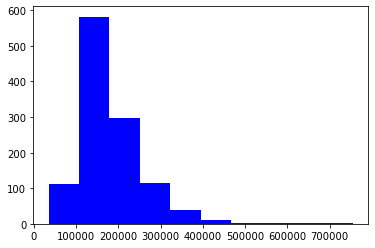

In [20]:
print ("Skew is:", train_data.SalePrice.skew())
plt.hist(train_data.SalePrice, color='blue')
plt.show()

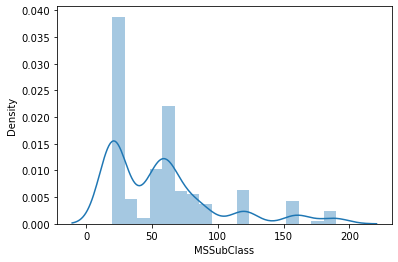

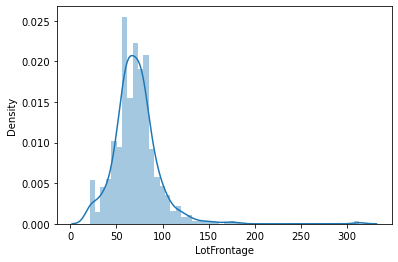

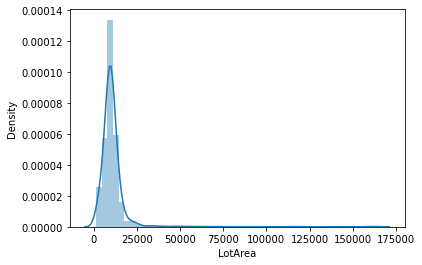

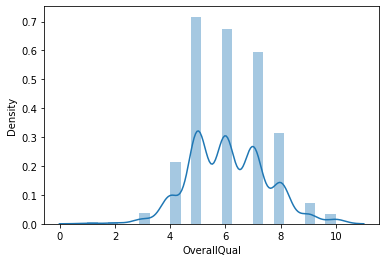

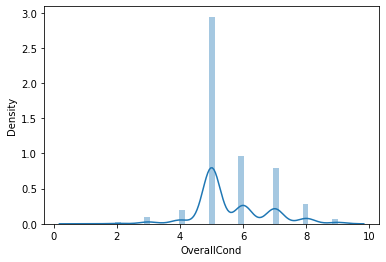

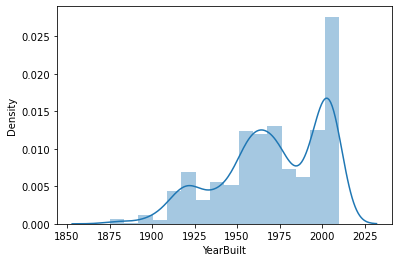

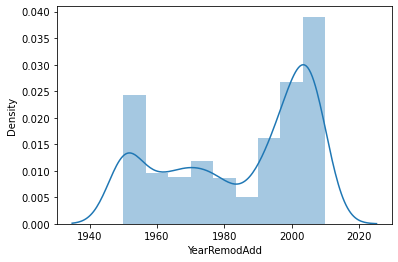

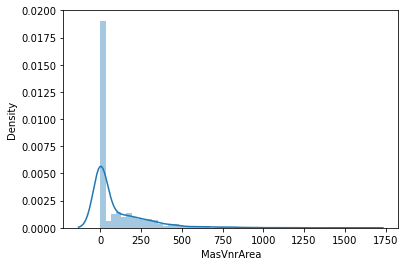

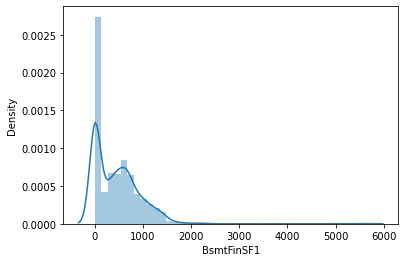

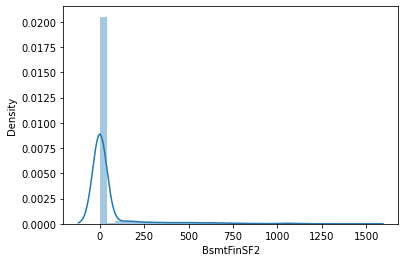

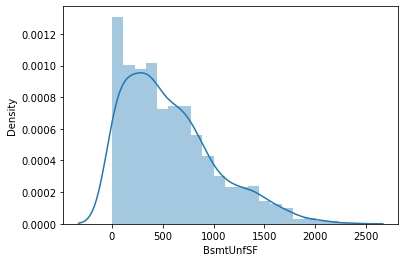

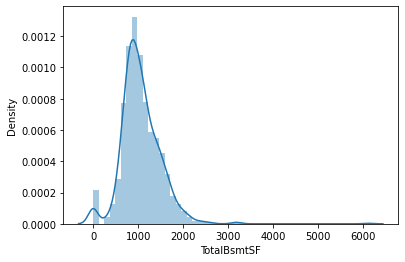

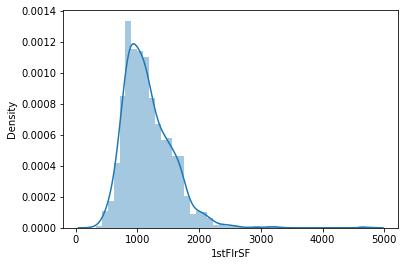

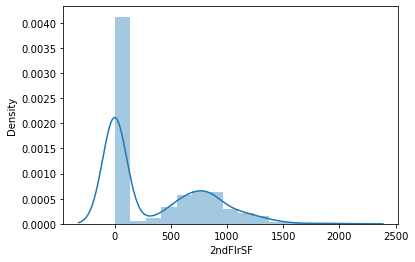

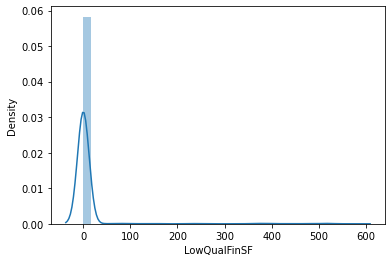

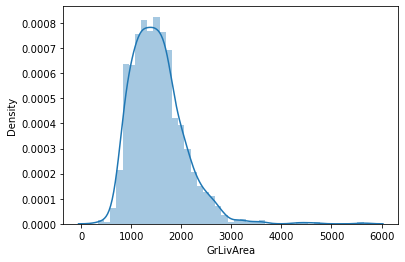

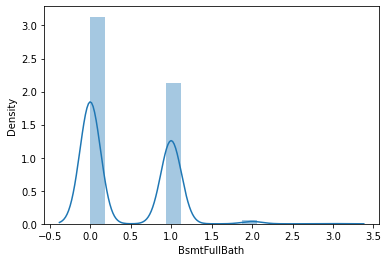

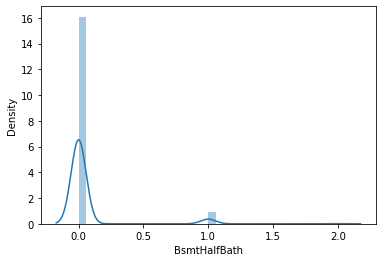

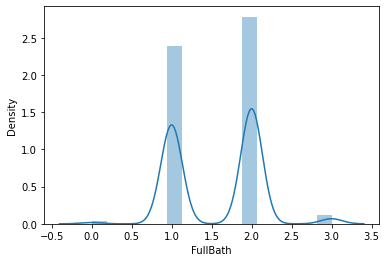

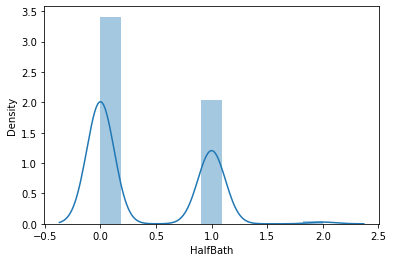

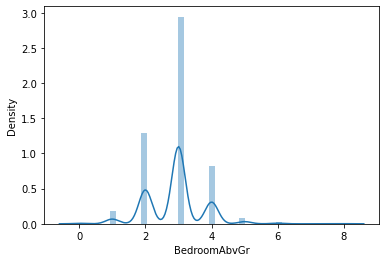

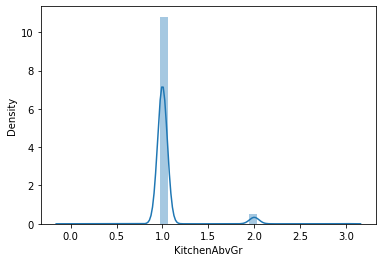

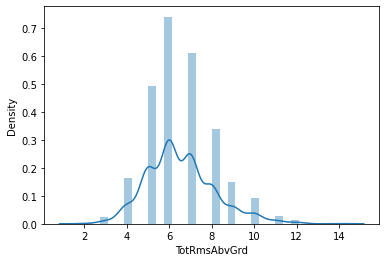

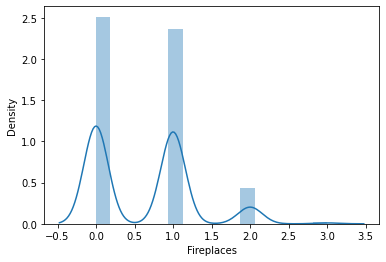

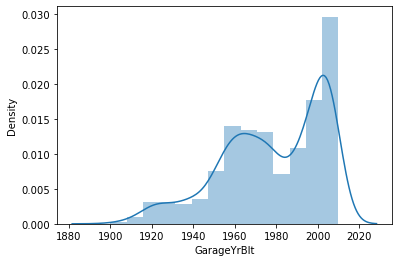

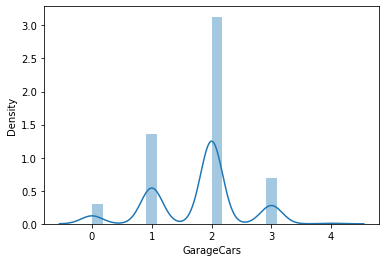

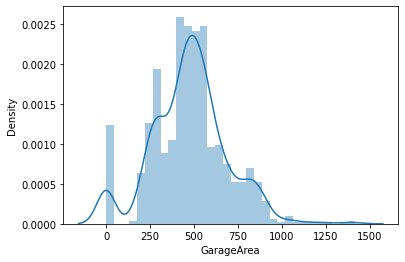

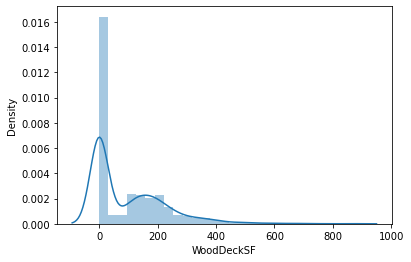

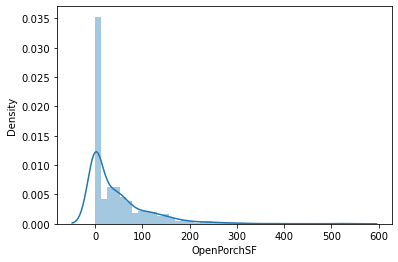

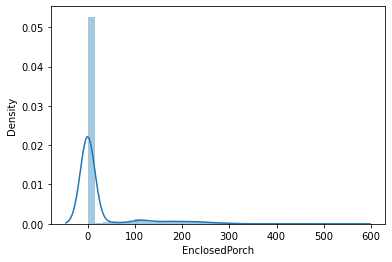

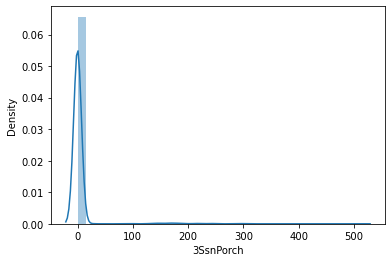

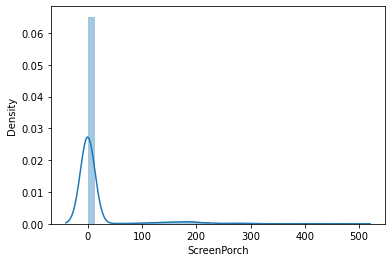

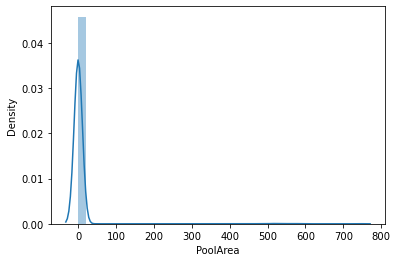

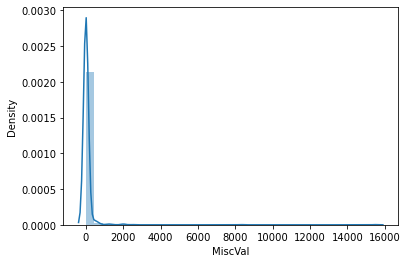

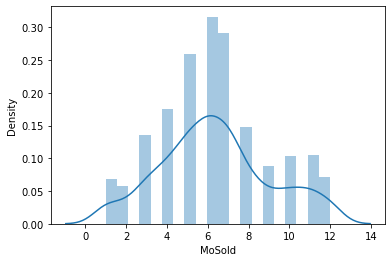

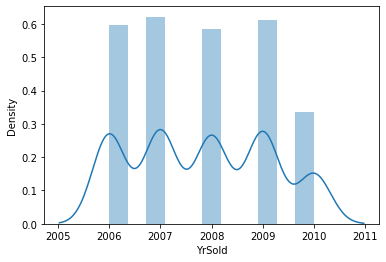

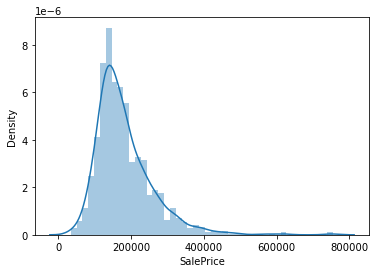

In [21]:
# Making of distplot to show the skewness in different columns
for g in train_data.describe().columns:
    sns.distplot(train_data[g])
    plt.show()

In [22]:
quality_pivot = train_data.pivot_table(index='OverallQual',
                  values='SalePrice', aggfunc=np.median)

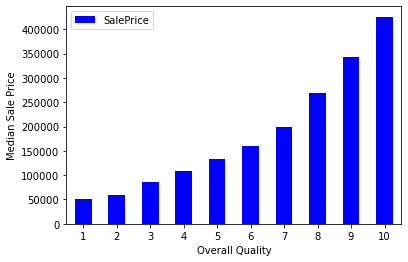

In [23]:
quality_pivot.plot(kind='bar', color='blue')
plt.xlabel('Overall Quality')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

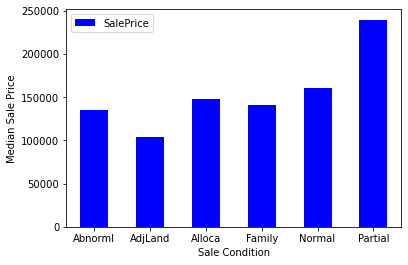

In [24]:
condition_pivot = train_data.pivot_table(index='SaleCondition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

<AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>

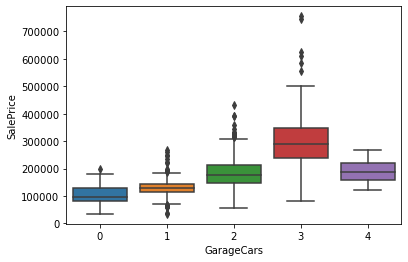

In [25]:
sns.boxplot(x=train_data['GarageCars'], y=train_data['SalePrice'])

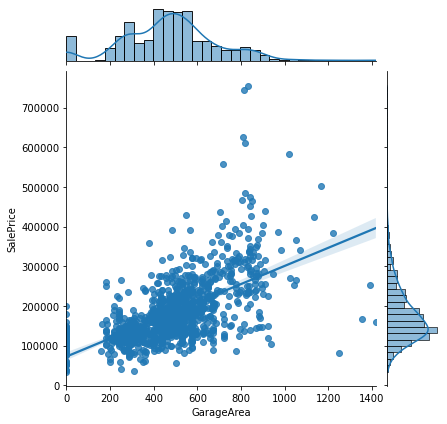

In [28]:
# Garage Area vs Sale Price
sns.jointplot(x=train_data['GarageArea'], y=train_data['SalePrice'],kind='reg')

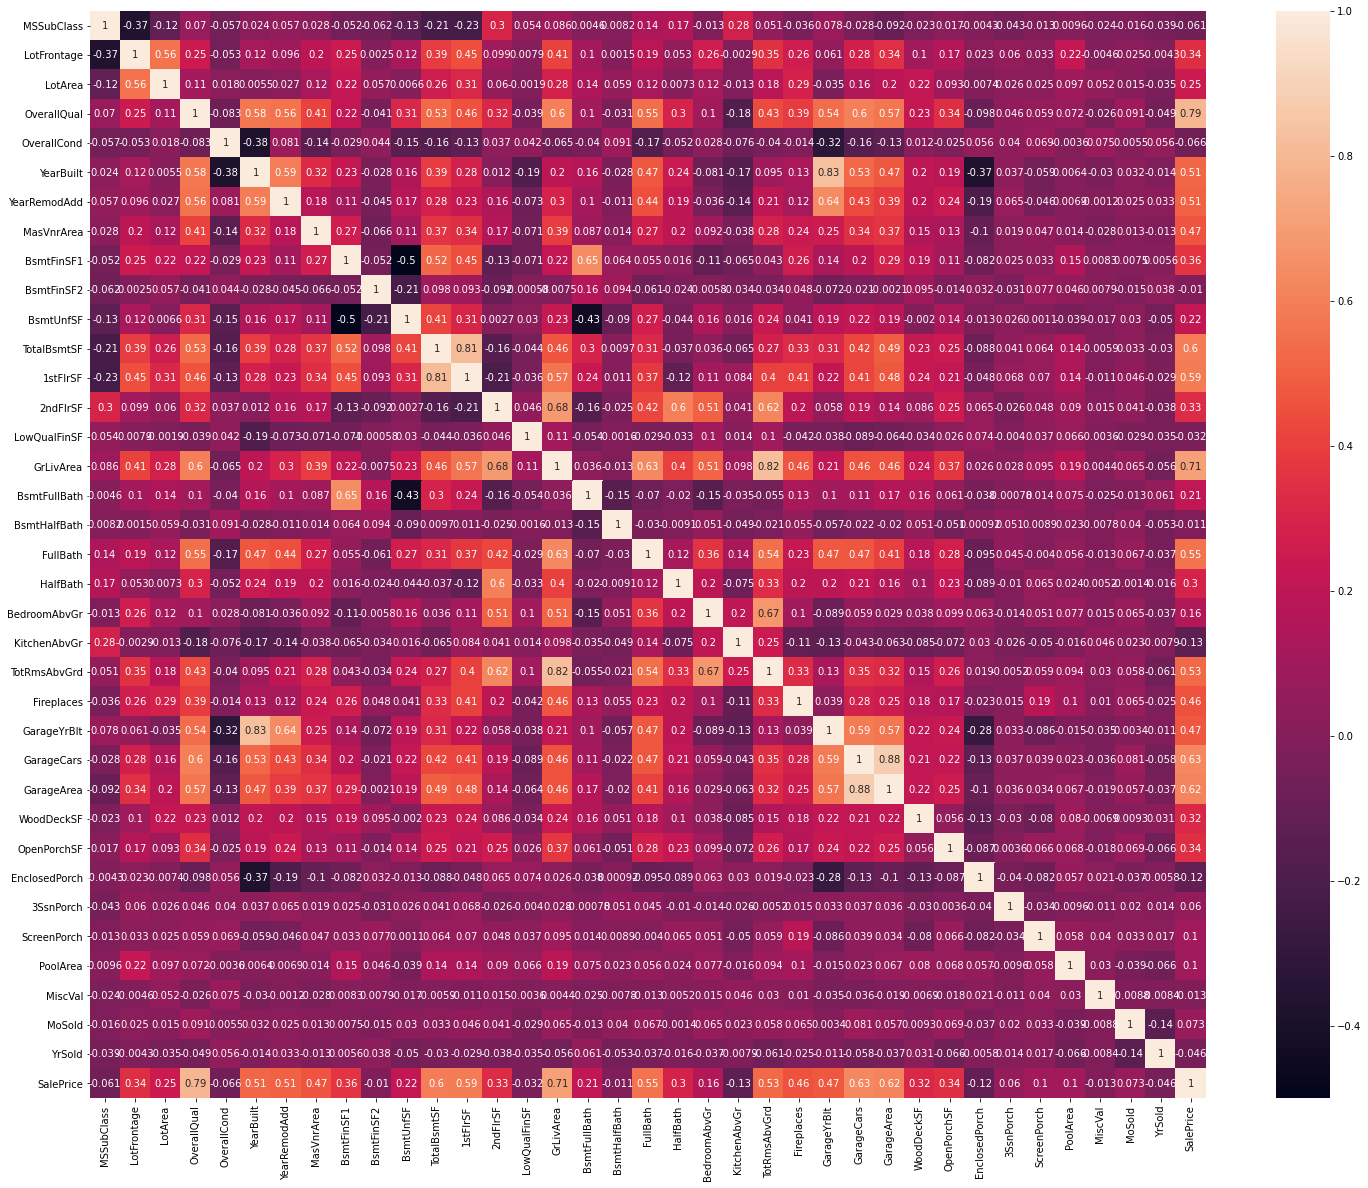

In [605]:
plt.figure(figsize=(25, 20))
sns.heatmap(train_data.corr(), annot=True)
plt.show()

# Highest correlation with the target column 'SalePrice' is with the 'OverallQual','GriLivArea','GarageCars','GarageArea'

# Checking top 5 feature which has good relationship with the target column "SalePrice"

In [606]:
train_data[['SaleCondition', 'SalePrice']].groupby(['SaleCondition'], as_index=False).mean().sort_values(by='SalePrice', ascending=False)

SaleCondition      SalePrice
5       Partial  269585.231481
4        Normal  175436.408466
2        Alloca  167377.416667
3        Family  149138.888889
0       Abnorml  147567.938272
1       AdjLand  104125.000000

In [607]:
train_data[['OverallQual', 'SalePrice']].groupby(['OverallQual'], as_index=False).mean().sort_values(by='SalePrice', ascending=False)

OverallQual      SalePrice
9           10  437554.066667
8            9  371024.093750
7            8  273051.804348
6            7  207887.973077
5            6  162520.711864
4            5  133340.378981
3            4  110892.086022
2            3   88498.437500
1            2   51770.333333
0            1   50150.000000

In [608]:
train_data[['GrLivArea', 'SalePrice']].groupby(['GrLivArea'], as_index=False).mean().sort_values(by='SalePrice', ascending=False)

GrLivArea  SalePrice
742       4316   755000.0
743       4476   745000.0
741       3627   625000.0
675       2364   611657.0
728       2822   582933.0
..         ...        ...
6          693    52500.0
10         729    52000.0
248       1317    40000.0
0          334    39300.0
2          480    35311.0

[746 rows x 2 columns]

In [609]:
train_data[['GarageArea', 'SalePrice']].groupby(['GarageArea'], as_index=False).mean().sort_values(by='SalePrice', ascending=False)

GarageArea      SalePrice
341         832  755000.000000
332         813  745000.000000
329         807  625000.000000
379        1020  582933.000000
293         716  556581.000000
..          ...            ...
8           200   73333.333333
39          287   72500.000000
20          246   60000.000000
65          350   60000.000000
21          250   40000.000000

[392 rows x 2 columns]

In [610]:
train_data[['GarageCars', 'SalePrice']].groupby(['GarageCars'], as_index=False).mean().sort_values(by='SalePrice', ascending=False)

GarageCars      SalePrice
3           3  304638.829932
4           4  190819.750000
2           2  184259.508271
1           1  129675.635417
0           0  102200.000000

## Preprocessing Pipeline

# Imputing the missing value and the 'NAN' value in the train_data set

In [611]:
train_data.fillna(0)

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0            120       RL          0.0     4928   Pave      IR1         Lvl   
1             20       RL         95.0    15865   Pave      IR1         Lvl   
2             60       RL         92.0     9920   Pave      IR1         Lvl   
3             20       RL        105.0    11751   Pave      IR1         Lvl   
4             20       RL          0.0    16635   Pave      IR1         Lvl   
...          ...      ...          ...      ...    ...      ...         ...   
1163          20       RL          0.0     9819   Pave      IR1         Lvl   
1164          20       RL         67.0     8777   Pave      Reg         Lvl   
1165         160       RL         24.0     2280   Pave      Reg         Lvl   
1166          70  C (all)         50.0     8500   Pave      Reg         Lvl   
1167          60       RL          0.0     7861   Pave      IR1         Lvl   

     Utilities LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch  \
0       AllPub    Inside       Gtl  ...             0         0           0   
1       AllPub    Inside       Mod  ...             0         0         224   
2       AllPub   CulDSac       Gtl  ...             0         0           0   
3       AllPub    Inside       Gtl  ...             0         0           0   
4       AllPub       FR2       Gtl  ...             0         0           0   
...        ...       ...       ...  ...           ...       ...         ...   
1163    AllPub    Inside       Gtl  ...             0         0           0   
1164    AllPub    Inside       Gtl  ...             0         0           0   
1165    AllPub       FR2       Gtl  ...             0         0           0   
1166    AllPub    Inside       Gtl  ...           172         0           0   
1167    AllPub    Inside       Gtl  ...             0         0           0   

     PoolArea MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  
0           0       0       2    2007        WD         Normal    128000  
1           0       0      10    2007        WD         Normal    268000  
2           0       0       6    2007        WD         Normal    269790  
3           0       0       1    2010       COD         Normal    190000  
4           0       0       6    2009        WD         Normal    215000  
...       ...     ...     ...     ...       ...            ...       ...  
1163        0       0       2    2010        WD         Normal    122000  
1164        0       0       5    2009        WD         Normal    108000  
1165        0       0       7    2009        WD         Normal    148500  
1166        0       0       7    2008        WD         Normal     40000  
1167        0       0       6    2006        WD         Normal    183200  

[1168 rows x 75 columns]

In [612]:
# Impute Missing value for LotFrontage
train_data['LotFrontage'].fillna(train_data['LotFrontage'].mean(),inplace=True)

# Impute Missing value for MasVnrType
train_data['MasVnrType'].fillna(train_data['MasVnrType'].mode(),inplace=True)

# Impute Missing value for MasVnrArea
train_data['MasVnrArea'].fillna(train_data['MasVnrArea'].mean(),inplace=True)

# Impute Missing value for BsmtQual
train_data['BsmtQual'].fillna(train_data['BsmtQual'].mode(),inplace=True)

# Impute Missing value for BsmtCond
train_data['BsmtCond'].fillna(train_data['BsmtCond'].mode(),inplace=True)

# Impute Missing value for BsmtExposure
train_data['BsmtExposure'].fillna(train_data['BsmtExposure'].mode(),inplace=True)

# Impute Missing value for BsmtFinType1
train_data['BsmtFinType1'].fillna(train_data['BsmtFinType1'].mode(),inplace=True)

# Impute Missing value for BsmtFinType2
train_data['BsmtFinType2'].fillna(train_data['BsmtFinType2'].mode(),inplace=True)

# Impute Missing value for FireplaceQu
train_data['FireplaceQu'].fillna(train_data['FireplaceQu'].mode(),inplace=True)

# Impute Missing value for GarageType
train_data['GarageType'].fillna(train_data['GarageType'].mode(),inplace=True)

# Impute Missing value for GarageYrBlt
train_data['GarageYrBlt'].fillna(train_data['GarageYrBlt'].mean(),inplace=True)

# Impute Missing value for garageFinish
train_data['GarageFinish'].fillna(train_data['GarageFinish'].mode(),inplace=True)

# Impute Missing value for GarageQual
train_data['GarageQual'].fillna(train_data['GarageQual'].mode(),inplace=True)

# Impute Missing value for garageCond
train_data['GarageCond'].fillna(train_data['GarageCond'].mode(),inplace=True)

In [613]:
train_data.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 75, dtype: int64

# Lets Impute the missing value and the Nan value in the test_data set

In [614]:
test_data.fillna(0)

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0            20       RL         86.0    14157   Pave      IR1         HLS   
1           120       RL          0.0     5814   Pave      IR1         Lvl   
2            20       RL          0.0    11838   Pave      Reg         Lvl   
3            70       RL         75.0    12000   Pave      Reg         Bnk   
4            60       RL         86.0    14598   Pave      IR1         Lvl   
..          ...      ...          ...      ...    ...      ...         ...   
287          20       RL         78.0    10206   Pave      Reg         Lvl   
288          20       RL         57.0     9245   Pave      IR2         Lvl   
289          20       RL          0.0    11241   Pave      IR1         Lvl   
290          50       RM         50.0     5000   Pave      Reg         Lvl   
291         160       RM         21.0     1953   Pave      Reg         Lvl   

    Utilities LotConfig LandSlope  ... OpenPorchSF EnclosedPorch 3SsnPorch  \
0      AllPub    Corner       Gtl  ...          51             0         0   
1      AllPub   CulDSac       Gtl  ...           0             0         0   
2      AllPub    Inside       Gtl  ...         151             0         0   
3      AllPub    Inside       Gtl  ...           0             0         0   
4      AllPub   CulDSac       Gtl  ...          18             0         0   
..        ...       ...       ...  ...         ...           ...       ...   
287    AllPub    Inside       Gtl  ...          99             0         0   
288    AllPub    Inside       Gtl  ...           0             0         0   
289    AllPub   CulDSac       Gtl  ...           0             0         0   
290    AllPub    Corner       Gtl  ...          24            36         0   
291    AllPub    Inside       Gtl  ...           0             0         0   

    ScreenPorch PoolArea  MiscVal  MoSold  YrSold  SaleType SaleCondition  
0             0        0        0       7    2007        WD        Normal  
1             0        0        0       8    2009       COD       Abnorml  
2             0        0        0       6    2009        WD        Normal  
3             0        0        0       7    2009        WD        Normal  
4             0        0        0       1    2008        WD        Normal  
..          ...      ...      ...     ...     ...       ...           ...  
287           0        0        0      10    2008        WD        Normal  
288           0        0        0       2    2008        WD        Normal  
289           0        0      700       3    2010        WD        Normal  
290           0        0        0      10    2006        WD        Normal  
291           0        0        0       6    2006        WD        Normal  

[292 rows x 74 columns]

In [615]:
# Impute Missing value for LotFrontage
test_data['LotFrontage'].fillna(test_data['LotFrontage'].mean(),inplace=True)

# Impute Missing value for MasVnrType
test_data['MasVnrType'].fillna(test_data['MasVnrType'].mode(),inplace=True)

# Impute Missing value for MasVnrArea
test_data['MasVnrArea'].fillna(test_data['MasVnrArea'].mean(),inplace=True)

# Impute Missing value for BsmtQual
test_data['BsmtQual'].fillna(test_data['BsmtQual'].mode(),inplace=True)

# Impute Missing value for BsmtCond
test_data['BsmtCond'].fillna(test_data['BsmtCond'].mode(),inplace=True)

# Impute Missing value for BsmtExposure
test_data['BsmtExposure'].fillna(test_data['BsmtExposure'].mode(),inplace=True)

# Impute Missing value for BsmtFinType1
test_data['BsmtFinType1'].fillna(test_data['BsmtFinType1'].mode(),inplace=True)

# Impute Missing value for BsmtFinType2
test_data['BsmtFinType2'].fillna(test_data['BsmtFinType2'].mode(),inplace=True)

# Impute Missing value for FireplaceQu
test_data['FireplaceQu'].fillna(test_data['FireplaceQu'].mode(),inplace=True)

# Impute Missing value for GarageType
test_data['GarageType'].fillna(test_data['GarageType'].mode(),inplace=True)

# Impute Missing value for GarageYrBlt
test_data['GarageYrBlt'].fillna(test_data['GarageYrBlt'].mean(),inplace=True)

# Impute Missing value for garageFinish
test_data['GarageFinish'].fillna(test_data['GarageFinish'].mode(),inplace=True)

# Impute Missing value for GarageQual
test_data['GarageQual'].fillna(test_data['GarageQual'].mode(),inplace=True)

# Impute Missing value for garageCond
test_data['GarageCond'].fillna(test_data['GarageCond'].mode(),inplace=True)

In [616]:
test_data.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 74, dtype: int64

In [ ]:
## Lets Look Out First that Whether both The data are "Set"

In [617]:
set(train_data['MSSubClass'])==set(test_data['MSSubClass'])

True

In [618]:
set(train_data['MSZoning'])==set(test_data['MSZoning'])

False

In [619]:
train_data['MSZoning'].value_counts()

RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64

In [620]:
test_data['MSZoning'].value_counts()

RL         223
RM          55
FV          13
C (all)      1
Name: MSZoning, dtype: int64

In [621]:
train_data['MSZoning']=train_data['MSZoning'].replace('RH','C (all)')

In [622]:
set(train_data['MSZoning'])==set(test_data['MSZoning'])

True

In [623]:
set(train_data['Street'])==set(test_data['Street'])

True

In [624]:
set(train_data['LotShape'])==set(test_data['LotShape'])

True

In [625]:
set(train_data['LandContour'])==set(test_data['LandContour'])

True

In [626]:
set(train_data['Utilities'])==set(test_data['Utilities'])

False

In [627]:
train_data['Utilities'].value_counts()

AllPub    1168
Name: Utilities, dtype: int64

In [628]:
test_data['Utilities'].value_counts()

AllPub    291
NoSeWa      1
Name: Utilities, dtype: int64

In [629]:
test_data['Utilities']=test_data['Utilities'].replace('NoSeWa','AllPub')

In [630]:
set(train_data['Utilities'])==set(test_data['Utilities'])

True

In [631]:
set(train_data['LotConfig'])==set(test_data['LotConfig'])

True

In [632]:
set(train_data['LandSlope'])==set(test_data['LandSlope'])

True

In [633]:
set(train_data['Neighborhood'])==set(test_data['Neighborhood'])

False

In [634]:
train_data['Neighborhood'].value_counts()

NAmes      182
CollgCr    118
OldTown     86
Edwards     83
Somerst     68
Gilbert     64
NridgHt     61
Sawyer      60
NWAmes      59
SawyerW     51
BrkSide     50
Crawfor     45
NoRidge     35
Mitchel     34
IDOTRR      30
Timber      24
ClearCr     24
SWISU       21
StoneBr     19
Blmngtn     15
BrDale      11
Veenker      9
MeadowV      9
NPkVill      8
Blueste      2
Name: Neighborhood, dtype: int64

In [635]:
test_data['Neighborhood'].value_counts()

NAmes      43
CollgCr    32
OldTown    27
Somerst    18
Edwards    17
NridgHt    16
Gilbert    15
Mitchel    15
Sawyer     14
NWAmes     14
Timber     14
BrkSide     8
SawyerW     8
MeadowV     8
IDOTRR      7
StoneBr     6
NoRidge     6
Crawfor     6
BrDale      5
ClearCr     4
SWISU       4
Veenker     2
Blmngtn     2
NPkVill     1
Name: Neighborhood, dtype: int64

In [636]:
train_data['Neighborhood']=train_data['Neighborhood'].replace('Blueste','NPkVill')

In [637]:
set(train_data['Neighborhood'])==set(test_data['Neighborhood'])

True

In [638]:
set(train_data['Condition1'])==set(test_data['Condition1'])

False

In [639]:
train_data['Condition1'].value_counts()

Norm      1005
Feedr       67
Artery      38
RRAn        20
PosN        17
RRAe         9
PosA         6
RRNn         4
RRNe         2
Name: Condition1, dtype: int64

In [640]:
test_data['Condition1'].value_counts()

Norm      255
Feedr      14
Artery     10
RRAn        6
PosN        2
PosA        2
RRAe        2
RRNn        1
Name: Condition1, dtype: int64

In [641]:
train_data['Condition1']=train_data['Condition1'].replace('RRNe','RRAe')

In [642]:
set(train_data['Condition1'])==set(test_data['Condition1'])

True

In [643]:
set(train_data['Condition2'])==set(test_data['Condition2'])

False

In [644]:
train_data['Condition2'].value_counts()

Norm      1154
Feedr        6
PosN         2
Artery       2
RRAn         1
PosA         1
RRAe         1
RRNn         1
Name: Condition2, dtype: int64

In [645]:
test_data['Condition2'].value_counts()

Norm    291
RRNn      1
Name: Condition2, dtype: int64

In [646]:
train_data['Condition2']=train_data['Condition2'].replace(['Feedr','PosN','Artery','PosA','RRAn','RRAe'],'Norm')

In [647]:
set(train_data['Condition2'])==set(test_data['Condition2'])

True

In [648]:
set(train_data['BldgType'])==set(test_data['BldgType'])

True

In [649]:
set(train_data['HouseStyle'])==set(test_data['HouseStyle'])

True

In [650]:
set(train_data['RoofStyle'])==set(test_data['RoofStyle'])

False

In [651]:
train_data['RoofStyle'].value_counts()

Gable      915
Hip        225
Flat        12
Gambrel      9
Mansard      5
Shed         2
Name: RoofStyle, dtype: int64

In [652]:
test_data['RoofStyle'].value_counts()

Gable      226
Hip         61
Gambrel      2
Mansard      2
Flat         1
Name: RoofStyle, dtype: int64

In [653]:
train_data['RoofStyle']=train_data['RoofStyle'].replace('Shed','Gable')

In [654]:
set(train_data['RoofStyle'])==set(test_data['RoofStyle'])

True

In [655]:
set(train_data['RoofMatl'])==set(test_data['RoofMatl'])

False

In [656]:
train_data['RoofMatl'].value_counts()

CompShg    1144
Tar&Grv      10
WdShngl       6
WdShake       4
Metal         1
ClyTile       1
Membran       1
Roll          1
Name: RoofMatl, dtype: int64

In [657]:
test_data['RoofMatl'].value_counts()

CompShg    290
WdShake      1
Tar&Grv      1
Name: RoofMatl, dtype: int64

In [658]:
train_data['RoofMatl']=train_data['RoofMatl'].replace(['WdShngl','Metal','ClyTile','Membran','Roll'],'CompShg')

In [659]:
set(train_data['RoofMatl'])==set(test_data['RoofMatl'])

True

In [660]:
set(train_data['Exterior1st'])==set(test_data['Exterior1st'])

False

In [661]:
train_data['Exterior1st'].value_counts()

VinylSd    396
HdBoard    179
MetalSd    178
Wd Sdng    174
Plywood     93
CemntBd     42
BrkFace     41
Stucco      22
WdShing     19
AsbShng     19
Stone        2
BrkComm      1
ImStucc      1
AsphShn      1
Name: Exterior1st, dtype: int64

In [662]:
test_data['Exterior1st'].value_counts()

VinylSd    119
HdBoard     43
MetalSd     42
Wd Sdng     32
CemntBd     19
Plywood     15
BrkFace      9
WdShing      7
Stucco       3
CBlock       1
AsbShng      1
BrkComm      1
Name: Exterior1st, dtype: int64

In [663]:
train_data['Exterior1st']=train_data['Exterior1st'].replace(['AsphShn','Stone','ImStucc'],'Other')

In [664]:
test_data['Exterior1st']=test_data['Exterior1st'].replace('CBlock','Other')

In [665]:
set(train_data['Exterior1st'])==set(test_data['Exterior1st'])

True

In [666]:
set(train_data['Exterior2nd'])==set(test_data['Exterior2nd'])

False

In [667]:
train_data['Exterior2nd'].value_counts()

VinylSd    387
MetalSd    173
HdBoard    170
Wd Sdng    165
Plywood    118
CmentBd     42
Wd Shng     31
Stucco      23
BrkFace     20
AsbShng     18
ImStucc      8
Brk Cmn      5
Stone        4
AsphShn      3
Other        1
Name: Exterior2nd, dtype: int64

In [668]:
test_data['Exterior2nd'].value_counts()

VinylSd    117
MetalSd     41
HdBoard     37
Wd Sdng     32
Plywood     24
CmentBd     18
Wd Shng      7
BrkFace      5
Stucco       3
Brk Cmn      2
AsbShng      2
ImStucc      2
CBlock       1
Stone        1
Name: Exterior2nd, dtype: int64

In [669]:
train_data['Exterior2nd']=train_data['Exterior2nd'].replace('AsphShn','Other')
test_data['Exterior2nd']=test_data['Exterior2nd'].replace('CBlock','Other')

In [670]:
set(train_data['Exterior2nd'])==set(test_data['Exterior2nd'])

True

In [671]:
set(train_data['MasVnrType'])==set(test_data['MasVnrType'])

True

In [672]:
set(train_data['ExterQual'])==set(test_data['ExterQual'])

True

In [673]:
set(train_data['ExterCond'])==set(test_data['ExterCond'])

False

In [674]:
train_data['ExterCond'].value_counts()

TA    1022
Gd     117
Fa      26
Ex       2
Po       1
Name: ExterCond, dtype: int64

In [675]:
test_data['ExterCond'].value_counts()

TA    260
Gd     29
Fa      2
Ex      1
Name: ExterCond, dtype: int64

In [676]:
train_data['ExterCond']=train_data['ExterCond'].replace('Po','Fa')

In [677]:
set(train_data['ExterCond'])==set(test_data['ExterCond'])

True

In [678]:
set(train_data['Foundation'])==set(test_data['Foundation'])

True

In [679]:
set(train_data['BsmtQual'])==set(test_data['BsmtQual'])

True

In [680]:
set(train_data['BsmtCond'])==set(test_data['BsmtCond'])

False

In [681]:
train_data['BsmtCond'].value_counts()

TA    1041
Gd      56
Fa      39
Po       2
Name: BsmtCond, dtype: int64

In [682]:
test_data['BsmtCond'].value_counts()

TA    270
Gd      9
Fa      6
Name: BsmtCond, dtype: int64

In [683]:
train_data['BsmtCond']=train_data['BsmtCond'].replace('Po','Fa')

In [684]:
set(train_data['BsmtCond'])==set(test_data['BsmtCond'])

True

In [685]:
set(train_data['BsmtExposure'])==set(test_data['BsmtExposure'])

True

In [686]:
set(train_data['BsmtFinType1'])==set(test_data['BsmtFinType1'])

True

In [687]:
set(train_data['BsmtFinType2'])==set(test_data['BsmtFinType2'])

True

In [688]:
set(train_data['Heating'])==set(test_data['Heating'])

False

In [689]:
train_data['Heating'].value_counts()

GasA     1143
GasW       14
Grav        5
Wall        4
OthW        1
Floor       1
Name: Heating, dtype: int64

In [690]:
test_data['Heating'].value_counts()

GasA    285
GasW      4
Grav      2
OthW      1
Name: Heating, dtype: int64

In [691]:
train_data['Heating']=train_data['Heating'].replace(['Floor','Wall'],'OthW')

In [692]:
set(train_data['Heating'])==set(test_data['Heating'])

True

In [693]:
set(train_data['HeatingQC'])==set(test_data['HeatingQC'])

False

In [694]:
train_data['HeatingQC'].value_counts()

Ex    585
TA    352
Gd    192
Fa     38
Po      1
Name: HeatingQC, dtype: int64

In [695]:
test_data['HeatingQC'].value_counts()

Ex    156
TA     76
Gd     49
Fa     11
Name: HeatingQC, dtype: int64

In [696]:
train_data['HeatingQC']=train_data['HeatingQC'].replace('Po','Fa')

In [697]:
set(train_data['HeatingQC'])==set(test_data['HeatingQC'])

True

In [698]:
set(train_data['CentralAir'])==set(test_data['CentralAir'])

True

In [699]:
set(train_data['KitchenQual'])==set(test_data['KitchenQual'])

True

In [700]:
set(train_data['Functional'])==set(test_data['Functional'])

False

In [701]:
train_data['Functional'].value_counts()

Typ     1085
Min2      30
Min1      25
Mod       12
Maj1      11
Maj2       4
Sev        1
Name: Functional, dtype: int64

In [702]:
test_data['Functional'].value_counts()

Typ     275
Min1      6
Min2      4
Mod       3
Maj1      3
Maj2      1
Name: Functional, dtype: int64

In [703]:
train_data['Functional']=train_data['Functional'].replace('Sev','Maj2')

In [704]:
set(train_data['Functional'])==set(test_data['Functional'])

True

In [705]:
set(train_data['FireplaceQu'])==set(test_data['FireplaceQu'])

True

In [706]:
set(train_data['GarageType'])==set(test_data['GarageType'])

True

In [707]:
set(train_data['GarageFinish'])==set(test_data['GarageFinish'])

True

In [708]:
set(train_data['GarageQual'])==set(test_data['GarageQual'])

True

In [709]:
set(train_data['GarageCond'])==set(test_data['GarageCond'])

True

In [710]:
set(train_data['PavedDrive'])==set(test_data['PavedDrive'])

True

In [711]:
set(train_data['SaleType'])==set(test_data['SaleType'])

False

In [712]:
train_data['SaleType'].value_counts()


WD       999
New      106
COD       38
ConLD      8
ConLI      5
ConLw      4
CWD        3
Oth        3
Con        2
Name: SaleType, dtype: int64

In [713]:
test_data['SaleType'].value_counts()

WD       268
New       16
COD        5
ConLD      1
CWD        1
ConLw      1
Name: SaleType, dtype: int64

In [714]:
train_data['SaleType']=train_data['SaleType'].replace(['Con','ConLD','ConLI','ConLw'],'Oth')
test_data['SaleType']=test_data['SaleType'].replace(['ConLD','ConLw'],'Oth')

In [715]:
set(train_data['SaleType'])==set(test_data['SaleType'])

True

In [716]:
set(train_data['SaleCondition'])==set(test_data['SaleCondition'])

False

In [717]:
train_data['SaleCondition'].value_counts()

Normal     945
Partial    108
Abnorml     81
Family      18
Alloca      12
AdjLand      4
Name: SaleCondition, dtype: int64

In [718]:
test_data['SaleCondition'].value_counts()

Normal     253
Abnorml     20
Partial     17
Family       2
Name: SaleCondition, dtype: int64

In [719]:
train_data['SaleCondition']=train_data['SaleCondition'].replace(['AdjLand','Alloca'],'Normal')

In [720]:
set(train_data['SaleCondition'])==set(test_data['SaleCondition'])

True

In [723]:
le=preprocessing.LabelEncoder()
train_data['MSSubClass']=le.fit_transform(train_data['MSSubClass'])
test_data['MSSubClass']=le.fit_transform(test_data['MSSubClass'])

train_data['MSZoning']=le.fit_transform(train_data['MSZoning'])
test_data['MSZoning']=le.fit_transform(test_data['MSZoning'])

train_data['Street']=le.fit_transform(train_data['Street'])
test_data['Street']=le.fit_transform(test_data['Street'])

train_data['LotShape']=le.fit_transform(train_data['LotShape'])
test_data['LotShape']=le.fit_transform(test_data['LotShape'])

train_data['LandContour']=le.fit_transform(train_data['LandContour'])
test_data['LandContour']=le.fit_transform(test_data['LandContour'])

train_data['Utilities']=le.fit_transform(train_data['Utilities'])
test_data['Utilities']=le.fit_transform(test_data['Utilities'])

train_data['LotConfig']=le.fit_transform(train_data['LotConfig'])
test_data['LotConfig']=le.fit_transform(test_data['LotConfig'])

train_data['LandSlope']=le.fit_transform(train_data['LandSlope'])
test_data['LandSlope']=le.fit_transform(test_data['LandSlope'])

train_data['Neighborhood']=le.fit_transform(train_data['Neighborhood'])
test_data['Neighborhood']=le.fit_transform(test_data['Neighborhood'])

train_data['Condition1']=le.fit_transform(train_data['Condition1'])
test_data['Condition1']=le.fit_transform(test_data['Condition1'])

train_data['Condition2']=le.fit_transform(train_data['Condition2'])
test_data['Condition2']=le.fit_transform(test_data['Condition2'])

train_data['BldgType']=le.fit_transform(train_data['BldgType'])
test_data['BldgType']=le.fit_transform(test_data['BldgType'])
                                                                                                           
train_data['HouseStyle']=le.fit_transform(train_data['HouseStyle'])
test_data['HouseStyle']=le.fit_transform(test_data['HouseStyle'])

train_data['RoofStyle']=le.fit_transform(train_data['RoofStyle'])
test_data['RoofStyle']=le.fit_transform(test_data['RoofStyle'])

train_data['RoofMatl']=le.fit_transform(train_data['RoofMatl'])
test_data['RoofMatl']=le.fit_transform(test_data['RoofMatl'])

train_data['Exterior1st']=le.fit_transform(train_data['Exterior1st'])
test_data['Exterior1st']=le.fit_transform(test_data['Exterior1st'])

train_data['Exterior2nd']=le.fit_transform(train_data['Exterior2nd'])
test_data['Exterior2nd']=le.fit_transform(test_data['Exterior2nd'])

train_data['MasVnrType']=le.fit_transform(train_data['MasVnrType'])
test_data['MasVnrType']=le.fit_transform(test_data['MasVnrType'])

train_data['ExterQual']=le.fit_transform(train_data['ExterQual'])
test_data['ExterQual']=le.fit_transform(test_data['ExterQual'])

train_data['ExterCond']=le.fit_transform(train_data['ExterCond'])
test_data['ExterCond']=le.fit_transform(test_data['ExterCond'])
                                                       
train_data['Foundation']=le.fit_transform(train_data['Foundation'])
test_data['Foundation']=le.fit_transform(test_data['Foundation'])

train_data['BsmtQual']=le.fit_transform(train_data['BsmtQual'])
test_data['BsmtQual']=le.fit_transform(test_data['BsmtQual'])

train_data['BsmtCond']=le.fit_transform(train_data['BsmtCond'])
test_data['BsmtCond']=le.fit_transform(test_data['BsmtCond'])

train_data['BsmtExposure']=le.fit_transform(train_data['BsmtExposure'])
test_data['BsmtExposure']=le.fit_transform(test_data['BsmtExposure'])

train_data['BsmtFinType1']=le.fit_transform(train_data['BsmtFinType1'])
test_data['BsmtFinType1']=le.fit_transform(test_data['BsmtFinType1'])

train_data['BsmtFinType2']=le.fit_transform(train_data['BsmtFinType2'])
test_data['BsmtFinType2']=le.fit_transform(test_data['BsmtFinType2'])

train_data['Heating']=le.fit_transform(train_data['Heating'])
test_data['Heating']=le.fit_transform(test_data['Heating'])

train_data['HeatingQC']=le.fit_transform(train_data['HeatingQC'])
test_data['HeatingQC']=le.fit_transform(test_data['HeatingQC'])
                                                       
train_data['BsmtFinType1']=le.fit_transform(train_data['BsmtFinType1'])
test_data['BsmtFinType1']=le.fit_transform(test_data['BsmtFinType1'])

train_data['CentralAir']=le.fit_transform(train_data['CentralAir'])
test_data['CentralAir']=le.fit_transform(test_data['CentralAir'])

train_data['KitchenQual']=le.fit_transform(train_data['KitchenQual'])
test_data['KitchenQual']=le.fit_transform(test_data['KitchenQual']) 
   
train_data['Functional']=le.fit_transform(train_data['Functional'])
test_data['Functional']=le.fit_transform(test_data['Functional'])

train_data['FireplaceQu']=le.fit_transform(train_data['FireplaceQu'])
test_data['FireplaceQu']=le.fit_transform(test_data['FireplaceQu'])

train_data['GarageType']=le.fit_transform(train_data['GarageType'])
test_data['GarageType']=le.fit_transform(test_data['GarageType'])

train_data['GarageFinish']=le.fit_transform(train_data['GarageFinish'])
test_data['GarageFinish']=le.fit_transform(test_data['GarageFinish'])

train_data['GarageQual']=le.fit_transform(train_data['GarageQual'])
test_data['GarageQual']=le.fit_transform(test_data['GarageQual'])
                                                       
train_data['GarageCond']=le.fit_transform(train_data['GarageCond'])
test_data['GarageCond']=le.fit_transform(test_data['GarageCond'])

train_data['PavedDrive']=le.fit_transform(train_data['PavedDrive'])
test_data['PavedDrive']=le.fit_transform(test_data['PavedDrive'])

train_data['SaleType']=le.fit_transform(train_data['SaleType'])
test_data['SaleType']=le.fit_transform(test_data['SaleType'])

train_data['SaleCondition']=le.fit_transform(train_data['SaleCondition'])
test_data['SaleCondition']=le.fit_transform(test_data['SaleCondition'])      

# check the skewness in the Train_dataset

In [724]:
train_data.skew()

MSSubClass        0.657253
MSZoning         -0.857789
LotFrontage       2.710383
LotArea          10.659285
Street          -17.021969
                   ...    
MoSold            0.220979
YrSold            0.115765
SaleType         -2.788864
SaleCondition    -1.729464
SalePrice         1.953878
Length: 75, dtype: float64

In [725]:
# Removing the skewness
for i in train_data.columns:
        from sklearn.preprocessing import LabelEncoder
        le=LabelEncoder()
        train_data[i]=le.fit_transform(train_data[i])

In [726]:
train_data.skew()

MSSubClass        0.657253
MSZoning         -0.857789
LotFrontage       0.471005
LotArea           0.159219
Street          -17.021969
                   ...    
MoSold            0.220979
YrSold            0.115765
SaleType         -2.788864
SaleCondition    -1.729464
SalePrice         0.288099
Length: 75, dtype: float64

In [727]:
test_data.skew()

MSSubClass        0.667566
MSZoning          0.187174
LotFrontage       0.466813
LotArea          12.781805
Street          -12.020386
                   ...    
MiscVal          13.264758
MoSold            0.186504
YrSold            0.018412
SaleType         -3.887441
SaleCondition    -2.161104
Length: 74, dtype: float64

In [728]:
# Removing the skewness
for i in test_data.columns:
        from sklearn.preprocessing import LabelEncoder
        le=LabelEncoder()
        test_data[i]=le.fit_transform(test_data[i])

In [729]:
test_data.skew()

MSSubClass        0.667566
MSZoning          0.187174
LotFrontage       0.031054
LotArea           0.117428
Street          -12.020386
                   ...    
MiscVal           6.777846
MoSold            0.186504
YrSold            0.018412
SaleType         -3.887441
SaleCondition    -2.161104
Length: 74, dtype: float64

array([[<AxesSubplot:title={'center':'MSSubClass'}>,
        <AxesSubplot:title={'center':'MSZoning'}>,
        <AxesSubplot:title={'center':'LotFrontage'}>,
        <AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'Street'}>,
        <AxesSubplot:title={'center':'LotShape'}>,
        <AxesSubplot:title={'center':'LandContour'}>,
        <AxesSubplot:title={'center':'Utilities'}>,
        <AxesSubplot:title={'center':'LotConfig'}>],
       [<AxesSubplot:title={'center':'LandSlope'}>,
        <AxesSubplot:title={'center':'Neighborhood'}>,
        <AxesSubplot:title={'center':'Condition1'}>,
        <AxesSubplot:title={'center':'Condition2'}>,
        <AxesSubplot:title={'center':'BldgType'}>,
        <AxesSubplot:title={'center':'HouseStyle'}>,
        <AxesSubplot:title={'center':'OverallQual'}>,
        <AxesSubplot:title={'center':'OverallCond'}>,
        <AxesSubplot:title={'center':'YearBuilt'}>],
       [<AxesSubplot:title={'center':'YearRemodAdd'}>,


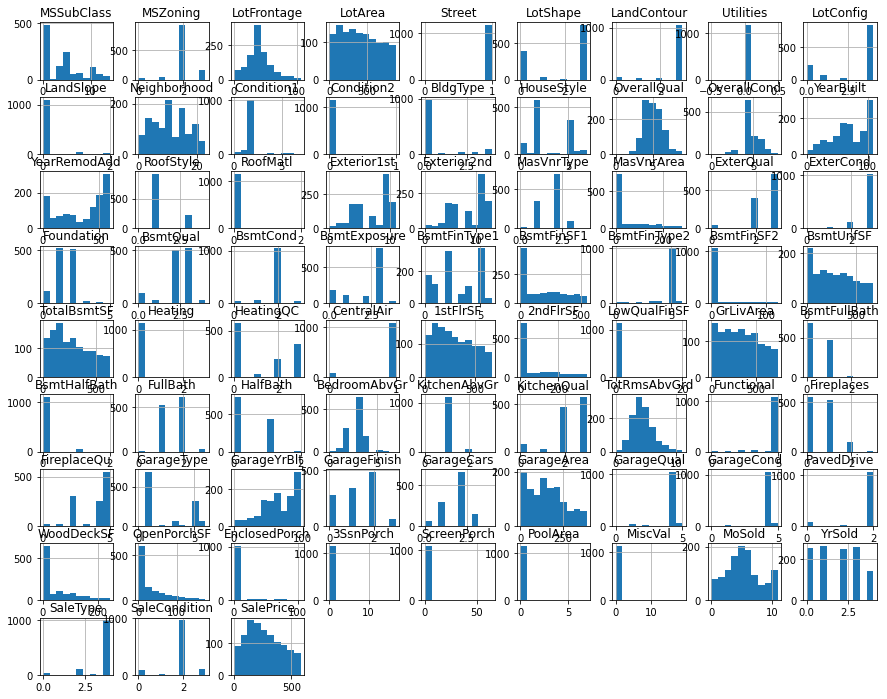

In [730]:
train_data.hist(figsize=(15,12))

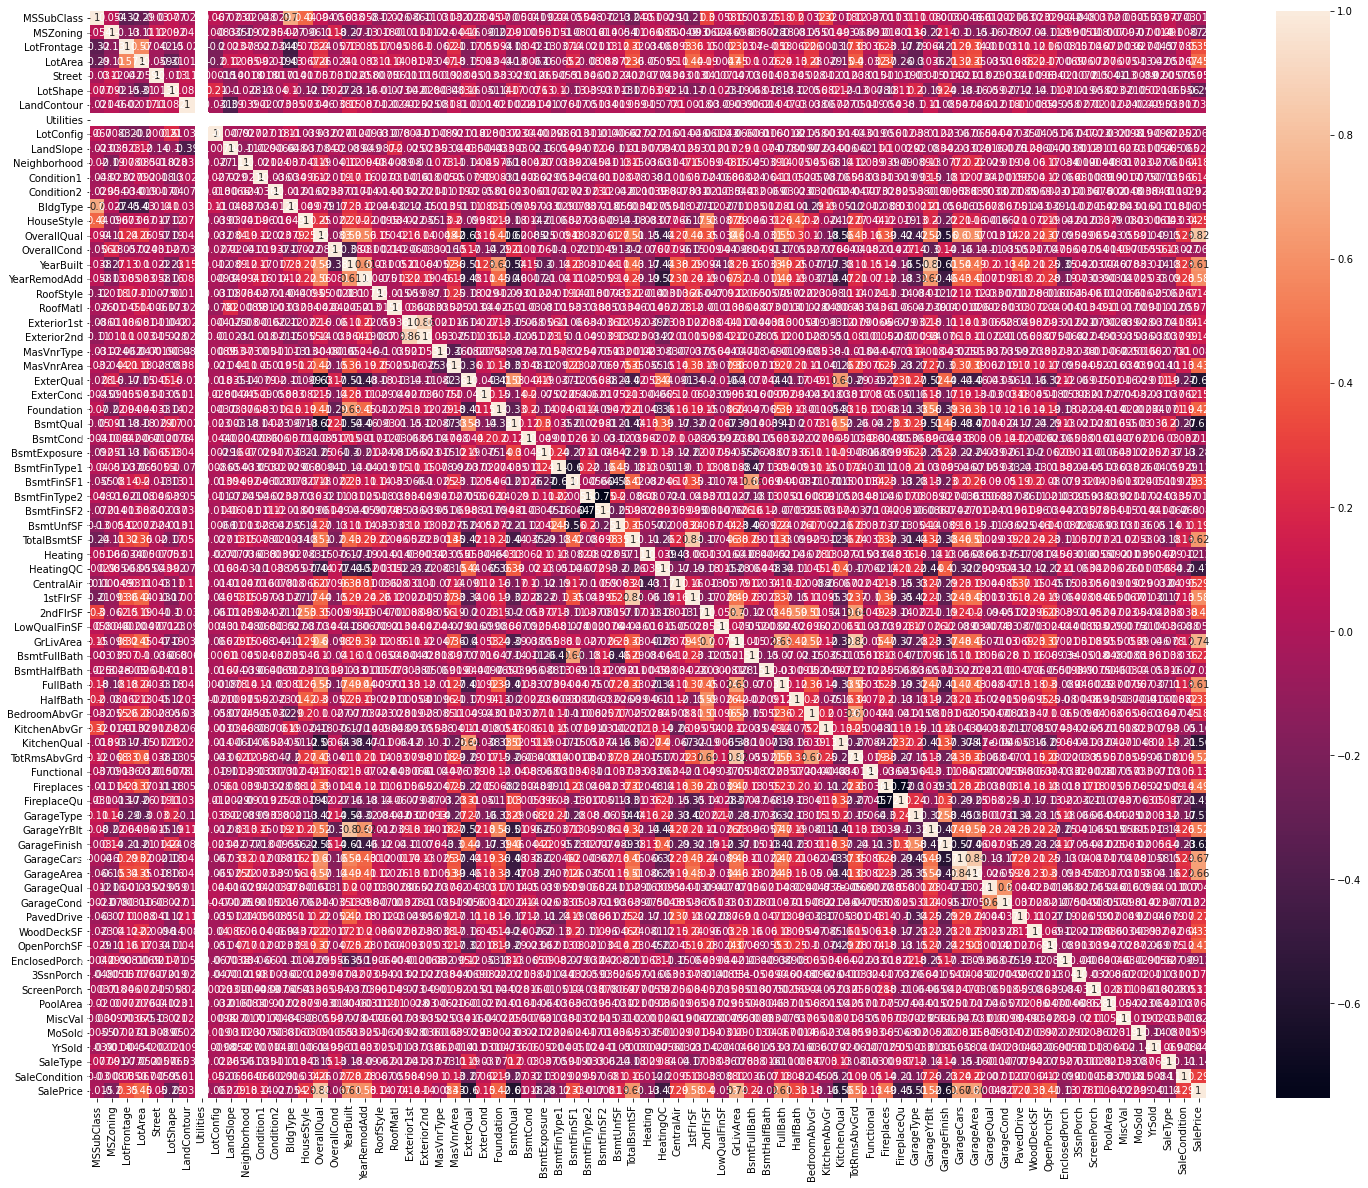

In [731]:
plt.figure(figsize=(25, 20))
sns.heatmap(train_data.corr(), annot=True)
plt.show()

In [732]:
train_data

MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
0             11         2           41       80       1         0   
1              0         2           66      808       1         0   
2              5         2           63      449       1         0   
3              0         2           76      632       1         0   
4              0         2           41      821       1         0   
...          ...       ...          ...      ...     ...       ...   
1163           0         2           41      438       1         0   
1164           0         2           37      313       1         3   
1165          12         2            1       15       1         3   
1166           6         0           20      280       1         3   
1167           5         2           41      219       1         0   

      LandContour  Utilities  LotConfig  LandSlope  ...  EnclosedPorch  \
0               3          0          4          0  ...              0   
1               3          0          4          1  ...              0   
2               3          0          1          0  ...              0   
3               3          0          4          0  ...              0   
4               3          0          2          0  ...              0   
...           ...        ...        ...        ...  ...            ...   
1163            3          0          4          0  ...              0   
1164            3          0          4          0  ...              0   
1165            3          0          2          0  ...              0   
1166            3          0          4          0  ...             58   
1167            3          0          4          0  ...              0   

      3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SaleType  \
0             0            0         0        0       1       1         4   
1             0           48         0        0       9       1         4   
2             0            0         0        0       5       1         4   
3             0            0         0        0       0       4         0   
4             0            0         0        0       5       3         4   
...         ...          ...       ...      ...     ...     ...       ...   
1163          0            0         0        0       1       4         4   
1164          0            0         0        0       4       3         4   
1165          0            0         0        0       6       3         4   
1166          0            0         0        0       6       2         4   
1167          0            0         0        0       5       0         4   

      SaleCondition  SalePrice  
0                 2        129  
1                 2        468  
2                 2        470  
3                 2        326  
4                 2        379  
...             ...        ...  
1163              2        114  
1164              2         76  
1165              2        200  
1166              2          4  
1167              2        306  

[1168 rows x 75 columns]

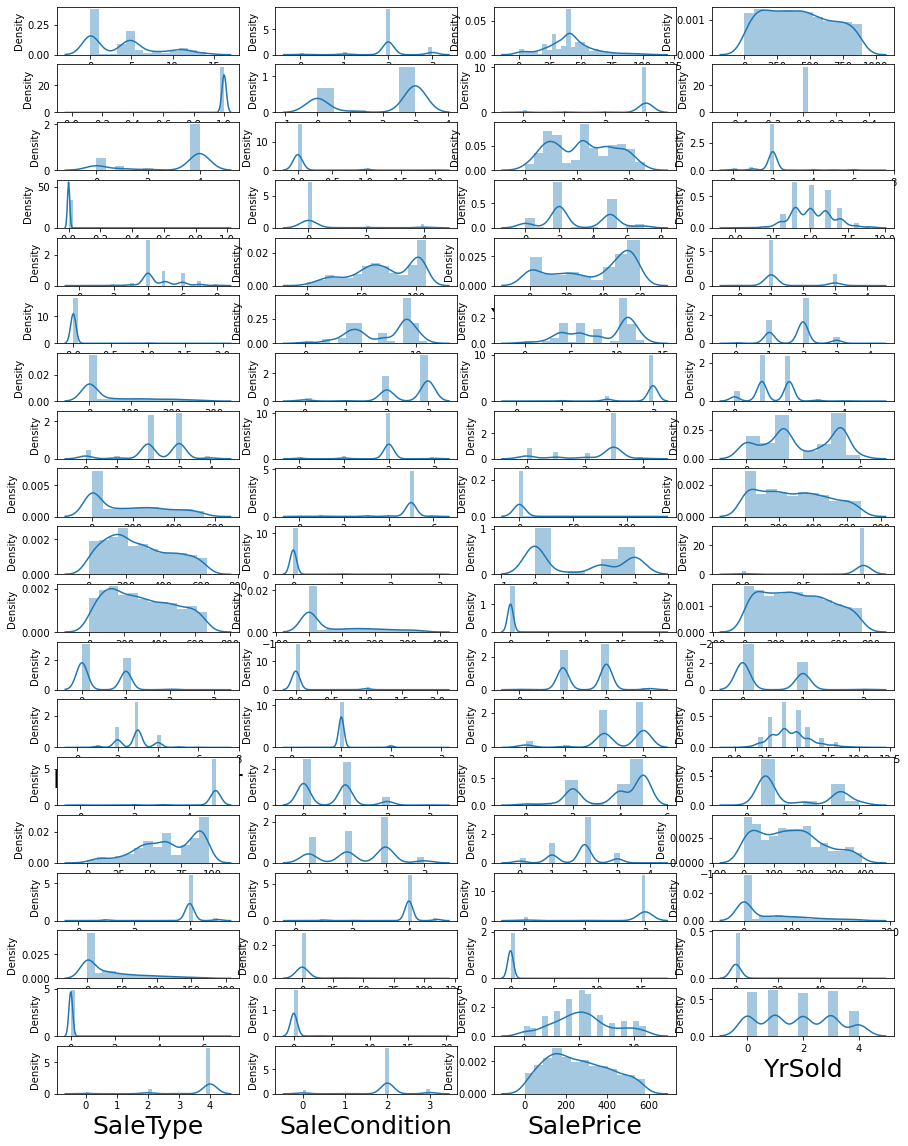

In [733]:
### Now we will visualize the data to see the outlier

plt.figure(figsize=(15,20),facecolor='white')
plotnumber=1


#for columns in data.columns.values:
for column in train_data:
    if plotnumber<=76:
        
        ax=plt.subplot(19,4,plotnumber)
        sns.distplot(train_data[column])
        plt.xlabel(column,fontsize=25)
    plotnumber+=1
plt.show()

# There is no need to do Z-score because no data loss

# Splitting the train_data_new into "X" as featues and "Y" as a target or vector

In [743]:
X = train_data.drop(['SalePrice'],axis=1)
Y = train_data['SalePrice']

In [744]:
from sklearn.model_selection import train_test_split,cross_val_score

# Splitting the data into train_test_split

In [746]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

# Model Building

In [747]:
# KNN Regression

knr=KNeighborsRegressor(n_neighbors=2)
knr.fit(x_train,y_train)
y_pred=knr.predict(x_test)

In [748]:
score=r2_score(y_test,y_pred)
score

0.715944355859967

In [749]:
# RandomForestRegressor

regressor=RandomForestRegressor(n_estimators = 100, random_state = 15)
regressor.fit(x_train,y_train)
y_Pred=regressor.predict(x_test)

In [750]:
scores=r2_score(y_test,y_Pred)
scores

0.857384343971539

In [751]:
cross_random_forest=cross_val_score(regressor,X,Y,cv=5)
cross_random_forest=cross_val_score(regressor,X,Y,cv=5).mean()

cross_random_forest 

0.8834331814620751

In [752]:
# Logistic Regression

lr= LogisticRegression()
lr.fit(x_train, y_train)
Y_pred = lr.predict(x_test)

In [753]:
score1=r2_score(y_test,y_Pred)
score1

0.857384343971539

In [757]:
# SGDRegressor

sgd=SGDRegressor()
sgd.fit(x_train, y_train)
Y_pred = sgd.predict(x_test)

In [758]:
score2=r2_score(y_test,y_Pred)
score2

0.857384343971539

In [760]:
# DecisionTreeRegressor

dt=DecisionTreeRegressor()
dt.fit(x_train, y_train)
Y_pred = dt.predict(x_test)

In [761]:
score3=r2_score(y_test,y_Pred)
score3

0.857384343971539

In [762]:
cross_dt=cross_val_score(dt,X,Y,cv=5)
cross_dt=cross_val_score(dt,X,Y,cv=5).mean()

cross_dt

0.7344939342998975

In [763]:
# Random Forest Classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


array = [10, 50, 100, 200, 500]

for num_trees in array:
    max_features = 5
    kfold = KFold(n_splits=10)
    model_1 = RandomForestRegressor(n_estimators=num_trees, max_features=max_features)
    results = cross_val_score(model_1, X, Y, cv=kfold)
    print('num_trees : %f (%f)'%(num_trees, results.mean()))

num_trees : 10.000000 (0.867347)
num_trees : 50.000000 (0.885797)
num_trees : 100.000000 (0.885949)
num_trees : 200.000000 (0.887634)
num_trees : 500.000000 (0.887198)


In [764]:
max_features = 5
model_2 = RandomForestRegressor(n_estimators=500, max_features=max_features)
model_2.fit(X, Y)
predictions = model_2.predict(test_data)
predictions

array([318.16 , 186.886, 249.836, 150.738, 275.482,  34.618, 138.762,
       292.688, 225.67 , 153.788,  41.348, 101.95 ,  93.264, 177.966,
       291.95 ,  87.238,  68.328,  96.026, 172.546, 201.868, 117.27 ,
       135.42 , 135.724,  57.452,  50.918,  93.776, 180.552, 117.816,
       187.778,  80.012, 100.244, 199.166, 230.588, 151.948,  73.468,
       191.108, 202.294,  69.288, 145.748, 137.156,  67.326, 281.726,
       228.828, 194.78 , 128.538, 101.06 ,  82.364,  70.398, 232.308,
       327.084, 121.94 , 187.124,  51.106,  38.324, 252.566, 119.206,
       134.064, 220.512,  90.026, 266.372,  60.708, 199.54 , 106.778,
       147.694, 204.152,  60.54 , 142.886, 209.534, 128.202, 128.714,
       263.928, 165.394, 150.15 , 127.42 , 124.406, 245.568, 307.048,
       196.332, 262.63 , 128.506, 228.316, 106.118, 127.35 , 138.9  ,
       213.52 , 212.29 ,  88.516, 291.816, 126.308, 186.678, 252.126,
       120.77 ,  96.172, 108.362, 207.098, 137.41 , 246.09 , 181.562,
       311.11 , 103.

In [765]:
test_data

MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
0             0         2           48      215       1         0   
1            11         2           31       34       1         0   
2             0         2           31      180       1         3   
3             6         2           40      185       1         3   
4             5         2           48      220       1         0   
..          ...       ...          ...      ...     ...       ...   
287           0         2           43      139       1         3   
288           0         2           21      115       1         1   
289           0         2           31      165       1         0   
290           4         3           16       24       1         3   
291          12         3            0        4       1         3   

     LandContour  Utilities  LotConfig  LandSlope  ...  OpenPorchSF  \
0              1          0          0          0  ...           27   
1              3          0          1          0  ...            0   
2              3          0          4          0  ...           72   
3              0          0          4          0  ...            0   
4              3          0          1          0  ...            3   
..           ...        ...        ...        ...  ...          ...   
287            3          0          4          0  ...           55   
288            3          0          4          0  ...            0   
289            3          0          1          0  ...            0   
290            3          0          0          0  ...            6   
291            3          0          4          0  ...            0   

     EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0                0          0            0         0        0       6       1   
1                0          0            0         0        0       7       3   
2                0          0            0         0        0       5       3   
3                0          0            0         0        0       6       3   
4                0          0            0         0        0       0       2   
..             ...        ...          ...       ...      ...     ...     ...   
287              0          0            0         0        0       9       2   
288              0          0            0         0        0       1       2   
289              0          0            0         0        6       2       4   
290              4          0            0         0        0       9       0   
291              0          0            0         0        0       5       0   

     SaleType  SaleCondition  
0           4              2  
1           0              0  
2           4              2  
3           4              2  
4           4              2  
..        ...            ...  
287         4              2  
288         4              2  
289         4              2  
290         4              2  
291         4              2  

[292 rows x 74 columns]

In [766]:
test_dummy=pd.get_dummies(test_data.iloc[:,0:74])

In [767]:
regressor.fit(x_train,y_train)
predict=regressor.predict(test_dummy)

In [768]:
predict.shape

(292,)

In [769]:
print(predict)

[297.54 166.22 140.54  79.59 111.42  25.79  67.56 199.27 161.65  81.78
  11.88  70.51  56.67  96.95 172.22  52.04  60.16  72.04 110.1  130.61
 101.67  66.96  83.33  19.59  23.98  59.67  76.28  55.19  89.45  49.69
  67.52 138.93 124.22  91.63  32.45  95.75  87.    37.62  85.77  78.4
  29.81 193.42 118.7  116.36  67.22  69.76  54.83  29.8  162.31 290.5
  71.59 105.85  27.73  16.43 137.65  62.18  70.13  97.35  42.17 151.09
  31.78  97.4   68.58  64.17 135.37  33.43 103.84 122.7   82.62  81.18
 180.04  88.28  96.12  84.57  82.97 146.99 198.98 125.09 188.86  79.06
 119.63  59.33  78.53  82.29  94.92 154.22  53.99 196.7   70.77  76.03
 131.95  57.39  50.35  46.99 102.99  83.65 146.36  93.19 210.62  63.23
 159.66  34.02  46.27  56.11 100.88  81.59 172.52  86.77  92.36 116.7
 115.01  87.34 101.53 121.1   42.53  37.44  67.77 104.17  96.87  43.58
  36.59 106.62 146.33  65.99  72.56 112.3   57.18 100.16  38.33  26.78
  68.04 137.29  94.85  74.51  86.8  179.94 134.22  39.51 173.9   49.31
  63.37 2

In [770]:
test_dummy['Price']=predict
test_dummy

MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
0             0         2           48      215       1         0   
1            11         2           31       34       1         0   
2             0         2           31      180       1         3   
3             6         2           40      185       1         3   
4             5         2           48      220       1         0   
..          ...       ...          ...      ...     ...       ...   
287           0         2           43      139       1         3   
288           0         2           21      115       1         1   
289           0         2           31      165       1         0   
290           4         3           16       24       1         3   
291          12         3            0        4       1         3   

     LandContour  Utilities  LotConfig  LandSlope  ...  EnclosedPorch  \
0              1          0          0          0  ...              0   
1              3          0          1          0  ...              0   
2              3          0          4          0  ...              0   
3              0          0          4          0  ...              0   
4              3          0          1          0  ...              0   
..           ...        ...        ...        ...  ...            ...   
287            3          0          4          0  ...              0   
288            3          0          4          0  ...              0   
289            3          0          1          0  ...              0   
290            3          0          0          0  ...              4   
291            3          0          4          0  ...              0   

     3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SaleType  \
0            0            0         0        0       6       1         4   
1            0            0         0        0       7       3         0   
2            0            0         0        0       5       3         4   
3            0            0         0        0       6       3         4   
4            0            0         0        0       0       2         4   
..         ...          ...       ...      ...     ...     ...       ...   
287          0            0         0        0       9       2         4   
288          0            0         0        0       1       2         4   
289          0            0         0        6       2       4         4   
290          0            0         0        0       9       0         4   
291          0            0         0        0       5       0         4   

     SaleCondition   Price  
0                2  297.54  
1                0  166.22  
2                2  140.54  
3                2   79.59  
4                2  111.42  
..             ...     ...  
287              2  158.86  
288              2   92.82  
289              2   91.55  
290              2   73.74  
291              2   39.53  

[292 rows x 75 columns]

# We have successfully predicted the price of the test_data

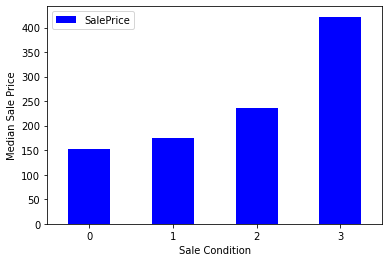

In [775]:
condition = train_data.pivot_table(index='SaleCondition', values='SalePrice', aggfunc=np.median)
condition.plot(kind='bar', color='blue')
plt.xlabel('Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

In [774]:
import joblib
joblib.dump(model_2,"HousingSalePricePredictionModel.pkl")

['HousingSalePricePredictionModel.pkl']